### Analytical

In [34]:
from sympy import symbols, integrate

# Define the symbolic variable and function for sympy
x = symbols('x')
func = -0.0125*x**3 + 0.115*x**2 + 1.18*x - 6.3

# Perform the analytical integration
analytical_integral = integrate(func, (x, 1.5, 15))
analytical_integral.evalf()


17.4308203125000

The analytical solution to the integral is approximately 
17.43.

### Monte Carlo Method - rectangle

In [44]:
import numpy as np

# Define the function to be integrated
def f(x):
    return -0.0125*x**3 + 0.115*x**2 + 1.18*x - 6.3

# Rectangular Monte Carlo integration
def rectangular_monte_carlo_integration(f, x_min, x_max, n):
    # Generate random x-values
    x_random = np.random.uniform(x_min, x_max, n)
    
    # Evaluate the function at these points
    f_values = f(x_random)
    
    # Calculate the width of each rectangle
    rectangle_width = (x_max - x_min) / n
    
    # Estimate the integral as the sum of the areas of the rectangles
    integral_estimate = np.sum(f_values) * rectangle_width
    
    return integral_estimate

# Integrate from 1.5 to 15 with N = 20000
N = 20000
integral_estimate = rectangular_monte_carlo_integration(f, 1.5, 15, N)

integral_estimate


17.21452282837598

The estimated value of the integral using the rectangular Monte Carlo integration method with 
N=20000 random samples is approximately 
17.21.

### Graph Plot

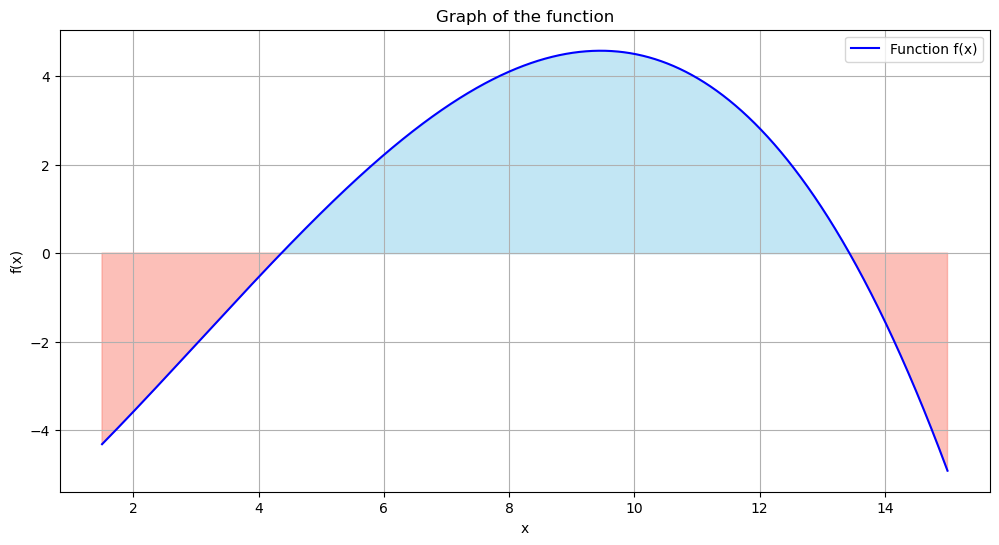

In [46]:
import matplotlib.pyplot as plt
# Define the number of points for graphing the function
graph_N = 20000

# Generate a range of x values for plotting the function
x_values_function = np.linspace(1.5, 15, graph_N)
y_values_function = f(x_values_function)

# Plot the function with the area filled above and below the x-axis
plt.figure(figsize=(12, 6))
plt.plot(x_values_function, y_values_function, label='Function f(x)', color='blue')
# Fill between the function and the x-axis for positive y-values
plt.fill_between(x_values_function, y_values_function, where=(y_values_function >= 0), color='skyblue', alpha=0.5)
# Fill between the function and the x-axis for negative y-values
plt.fill_between(x_values_function, y_values_function, where=(y_values_function <= 0), color='salmon', alpha=0.5)
plt.title('Graph of the function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()


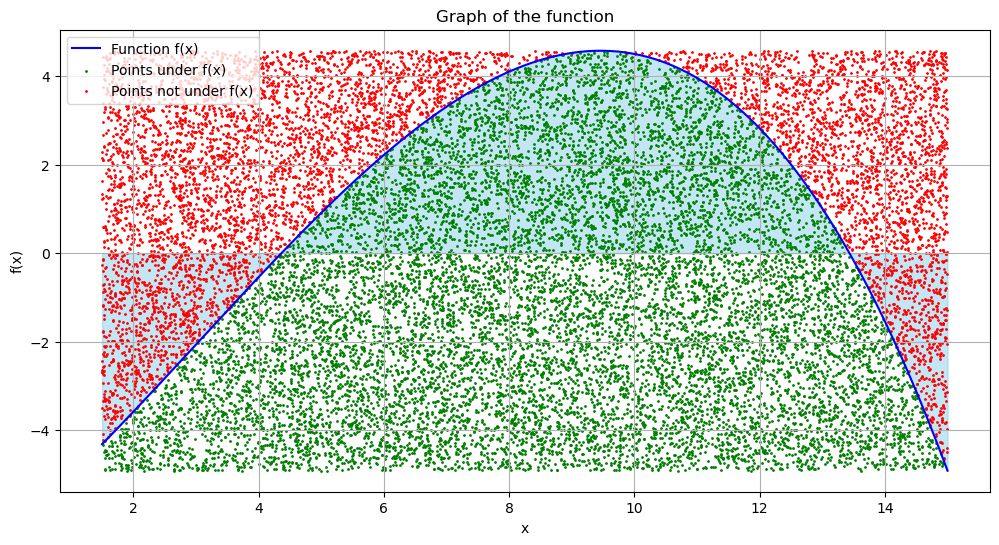

In [47]:
# Redefine the number of points for graphing the function
graph_N = 20000

# Generate a range of x values for plotting the function
x_values_function = np.linspace(1.5, 15, graph_N)
y_values_function = f(x_values_function)

# Generate random points for the Monte Carlo integration
x_random = np.random.uniform(1.5, 15, graph_N)
y_random = np.random.uniform(min(y_values_function), max(y_values_function), graph_N)

# Determine which random points are under the function
points_under_function = f(x_random) > y_random

# Plot the function
plt.figure(figsize=(12, 6))
plt.plot(x_values_function, y_values_function, label='Function f(x)', color='blue')
plt.fill_between(x_values_function, y_values_function, color='skyblue', alpha=0.5)
plt.title('Graph of the function')

# Plot random points that fall under the function
plt.scatter(x_random[points_under_function], y_random[points_under_function], color='green', s=1, label='Points under f(x)')

# Plot random points that do not fall under the function
plt.scatter(x_random[~points_under_function], y_random[~points_under_function], color='red', s=1, label='Points not under f(x)')

# Add labels, legend, and grid
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
